# EDA de los datasets 


Se realiza el Análisis Exploratorio de los datos de los tres conjuntos de datos ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

## Importaciones

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## EDA del dataset `output`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `output` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de archivo parquet y se guarda en un dataframe.

In [3]:
df_output = pd.read_parquet('output.parquet')
df_output.head()

,publisher,genres,app_name,release_date,price,item_id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,0.00,643980.0,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,0.00,670290.0,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,772540.0,Trickjump Games Ltd


Análisis de cada variable de manera individual

### Analizamos los duplicados

In [5]:
call_id_counts = df_output['item_id'].value_counts()
call_id_counts

item_id
761140.0    1
589740.0    1
466540.0    1
498240.0    1
454700.0    1
           ..
244750.0    1
602801.0    1
622355.0    1
305620.0    1
658870.0    1
Name: count, Length: 22529, dtype: int64

No muestra usuarios duplicados

### Analizamos los tipos de datos y si hay nulos

In [3]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22529 entries, 0 to 22528
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22529 non-null  object 
 1   genres        22529 non-null  object 
 2   app_name      22529 non-null  object 
 3   release_date  22529 non-null  object 
 4   price         22529 non-null  float64
 5   item_id       22529 non-null  float64
 6   developer     22529 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


Se revisan los tipos de datos y no se observan datos nulos ni valores faltantes, lo que corresponde a nuestro ETL Luego de haber realizado limpieza de los mismos

### Deteccion de Outliers

In [14]:
df_output.describe()

,price,item_id
count,22529.000000,2.252900e+04
mean,8.965943,4.307083e+05
std,15.414846,1.918428e+05
min,0.000000,1.000000e+01
25%,2.990000,3.022900e+05
50%,4.990000,4.269280e+05
75%,9.990000,5.807000e+05
max,995.000000,2.028850e+06


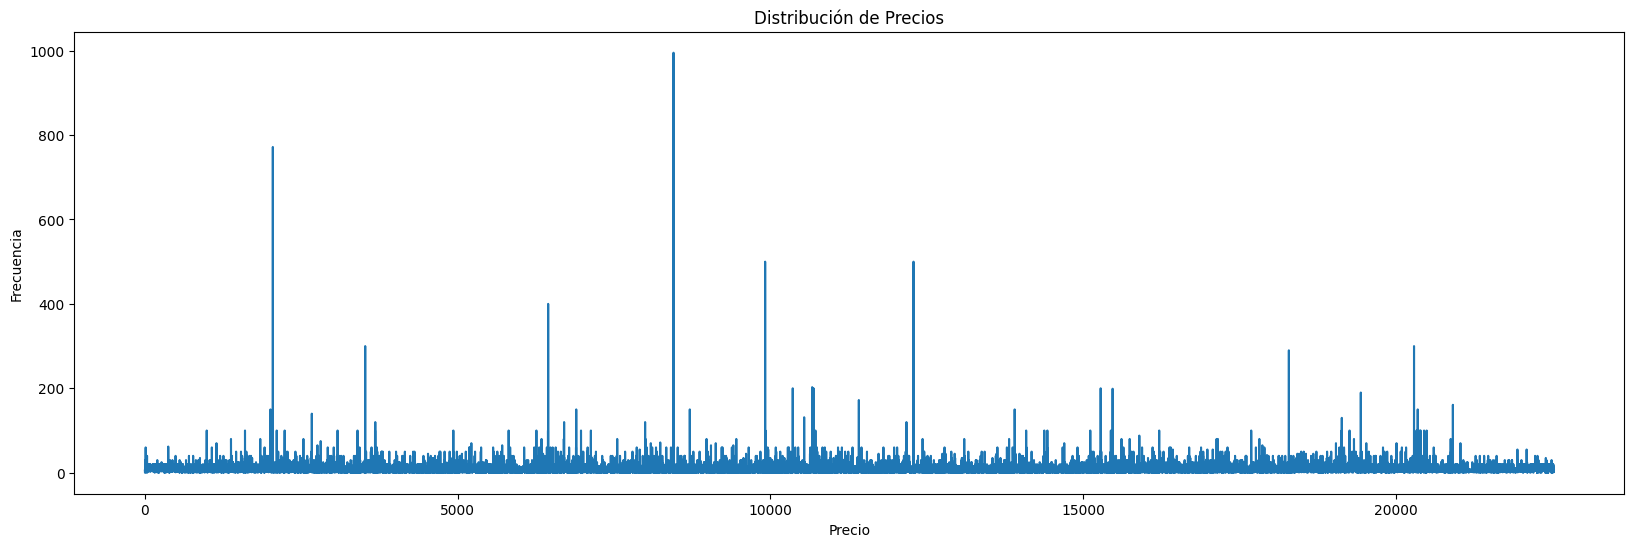

In [16]:

plt.figure(figsize=(20, 6))
sns.lineplot(df_output['price'])
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

### Detectamos algunos outliers, esto se debe a valores elevados de algunos juegos, pero no afectan al analisis 

### Analizamos la cantidad de registros, juegos y desarrolladores hay

In [172]:
print(f'La cantidad de registros que hay son: {df_output.shape[0]}')


La cantidad de registros que hay son: 38032


In [60]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de desarrolladores: {len(df_output['publisher'].unique())}")

Cantidad de desarrolladores: 1376


In [180]:
print(f"Cantidad de titulos disponibles: {len(df_output['app_name'].unique())}")

Cantidad de titulos disponibles: 2531


### Analizamos cuantos juegos son gratis

In [195]:
publishers_price_zero = df_output.loc[df_output['price'] == 0, 'publisher'].unique()
count_publishers_price_zero = len(publishers_price_zero)
print(f"Cantidad de desarrolladores con juegos gratis: {count_publishers_price_zero}")

Cantidad de desarrolladores con juegos gratis: 269


In [186]:
free_games_count = len(df_output[df_output['price'] == 0]['app_name'].unique())
print(f"Cantidad de juegos gratis: {free_games_count}")

Cantidad de juegos gratis: 304


## EDA del dataset  `user_items`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_items` que ya pasó por el proceso de ETL.

In [7]:
df_output = pd.read_parquet('user_items.parquet')
df_output.head()

,user_id,item_id,playtime_forever
0,76561197970982479,10,6.0
1,76561197970982479,30,7.0
2,76561197970982479,300,4733.0
3,76561197970982479,240,1853.0
4,76561197970982479,3830,333.0


### Analizamos los duplicados

In [33]:
call_id_counts = df_output['user_id'].value_counts()
call_id_counts

user_id
76561198108415635      10
NanoPi                 10
banksyyo               10
snubbo                 10
BuffinMutton           10
                       ..
554076033               1
_maximus                1
maxstupo                1
maxy21                  1
SkullainnLovesGoats     1
Name: count, Length: 25458, dtype: int64

En este caso, los valores duplicados son permitidos, puesto que es un usuario respecto a diferentes juegos, si se borran los duplicados, perdemos informacion vital para el analisis de este dashboard

In [11]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285246 entries, 0 to 3285245
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   item_id           object 
 2   playtime_forever  float64
dtypes: float64(1), object(2)
memory usage: 75.2+ MB


Se revisan los tipos de datos y se observan datos nulos, esto es debido a que no necesariamente una de las 3 columnas este obligadas a responder con un valor, mientras que en por lo menos 1 exista un registro que nos pueda sumar para respectivos analisis

In [16]:
print(f"Cantidad de usuarios: {len(df_output['user_id'].unique())}")

Cantidad de usuarios: 68403


In [21]:
print(f"Cantidad de horas jugadas en total: {df_output['playtime_forever'].sum()}")

Cantidad de horas jugadas en total: 5109381683.0


### Deteccion de Outliers

In [12]:
df_output.describe()

,playtime_forever
count,3.285246e+06
mean,1.555251e+03
std,6.721032e+03
min,1.000000e+00
25%,4.400000e+01
50%,2.050000e+02
75%,8.080000e+02
max,6.427730e+05


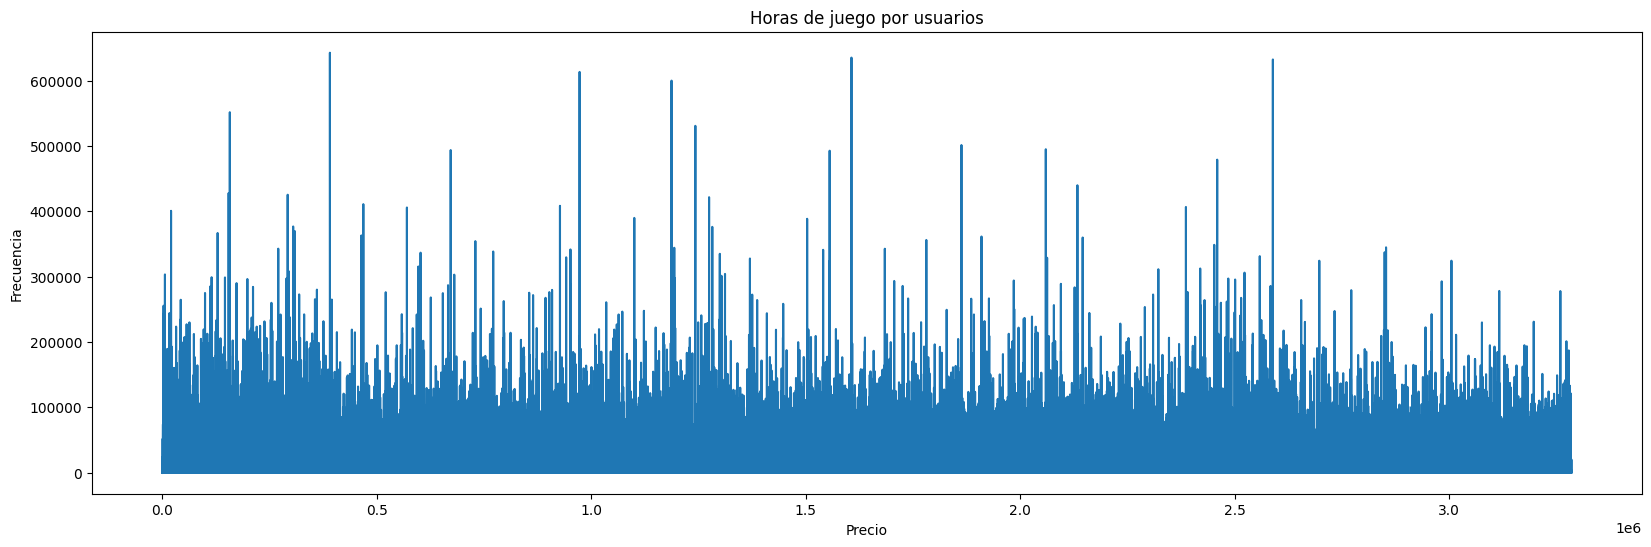

In [14]:
plt.figure(figsize=(20, 6))
sns.lineplot(df_output['playtime_forever'])
plt.title('Horas de juego por usuarios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

En este caso los Outliers detectados representan la cantidad de horas de juego de un usuario en particular, es posible que tengamos jugadores muy compenetrados con un juego y registre altas horas de game play

## EDA del dataset  `user_reviews`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_reviews` que ya pasó por el proceso de ETL.

In [23]:
df_output = pd.read_parquet('user_reviews.parquet')
df_output.head()

,posted,item_id,recommend,review,user_id,Sentiment_analysis
0,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,76561197970982479,2
1,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.,76561197970982479,2
2,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,1
3,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...,js41637,2
4,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...,js41637,1


In [32]:
call_id_counts = df_output['user_id'].value_counts()
call_id_counts

user_id
76561198108415635      10
NanoPi                 10
banksyyo               10
snubbo                 10
BuffinMutton           10
                       ..
554076033               1
_maximus                1
maxstupo                1
maxy21                  1
SkullainnLovesGoats     1
Name: count, Length: 25458, dtype: int64

In [34]:
call_id_counts = df_output['item_id'].value_counts()
call_id_counts

item_id
730       3708
440       3694
4000      1704
570       1544
218620    1113
          ... 
33100        1
312720       1
449980       1
32770        1
431510       1
Name: count, Length: 3682, dtype: int64

In [35]:
call_id_counts = df_output['posted'].value_counts()
call_id_counts

posted
Posted June 21, 2014.        220
Posted June 20, 2014.        192
Posted June 27, 2014.        171
Posted June 23, 2014.        171
Posted December 26, 2013.    169
                            ... 
Posted March 25, 2011.         1
Posted November 16, 2011.      1
Posted May 28, 2011.           1
Posted February 1, 2012.       1
Posted November 3, 2012.       1
Name: count, Length: 1906, dtype: int64

### Recomendaciones por `Sentiment_analysis` y `recommend`

In [24]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_output.groupby(['Sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_output)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
Sentiment_analysis recommend                      
0                  False          2470    4.227208
                   True           5500    9.412812
1                  False          3175    5.433759
                   True          21398   36.620972
2                  False          1094    1.872294
                   True          24794   42.432955

Lease como Positivos = 1, Neutrales = 2, Negativos = 0

Se puede ver que el sentimiento neutral recomienda el juego por lo que un podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un sentimiento negativo, aún recomienda el juego, lo que es algo contradictorio, a lo mejor simplemente no le gusto alguna parte del mismo, pero aun asi lo recomienda.

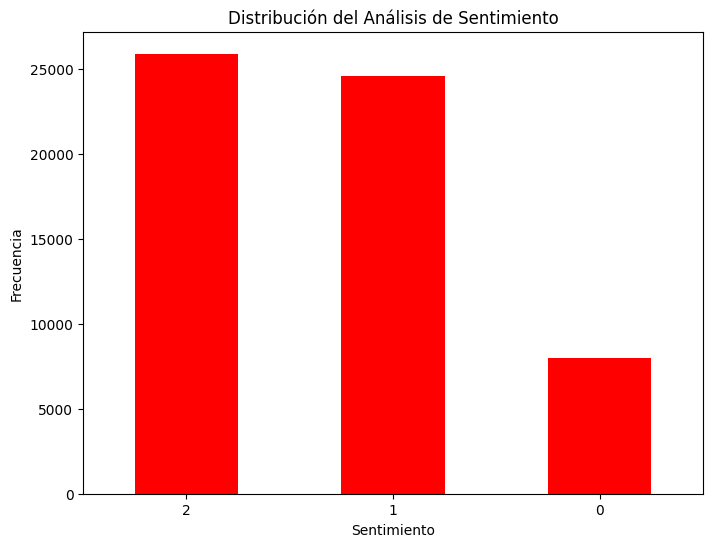

In [28]:
# Calcular la frecuencia de cada valor en la columna Sentiment_analysis
sentiment_counts = df_output['Sentiment_analysis'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='red')
plt.title('Distribución del Análisis de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()